## Kelvin Banks
## Machine Learning
## 3/31/2024

# Predicting Heart Disease
>Goal: Using various methods, the objective is to learn how to interpret the dataset to predict the causes of heart disease via classification model.

# Outline
Description: General details to cover and learn more about classification algorithms

1. Problem to solve.
2. Data
3. Evaluate data
4. Features
5. Machine Learning Model

## Problem To Solve
>With information about a patient, is it possible to find more information about their health.

## Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 

## Evaluation
>Goal: If model reaches 90 percent accuracy or above, then it can be proven that the patient is at risk of heart disease.

## Data Description
>Reference for terminology or column information

## Import Toolset
>Import libraries that will possibly be in use

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression


#Model Eval
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


## Load Data

In [123]:
heartData = pd.read_csv("heartdisease.csv")
heartData.shape

(303, 14)

## Data Exploration 
>Become more familiar with the data | 
The goal is to have enough information to predict the target column.

#### View first five rows

In [124]:
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### View last five rows

In [125]:
heartData.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [126]:
## Target displays how many patients are positive(1) or negative(0) for heart disease
heartData["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

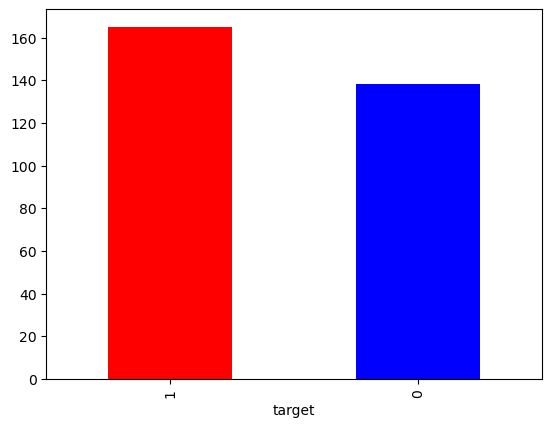

In [127]:
## Bar chart
## Red for positive and Blue for negative
heartData["target"].value_counts().plot(kind="bar", color=["Red","Blue"]);

In [128]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [129]:
# What's missing from the data? 0 == Nothing is missing
heartData.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 ## Plot Risk of Heart disease by gender
>Red for Female | Blue for Male

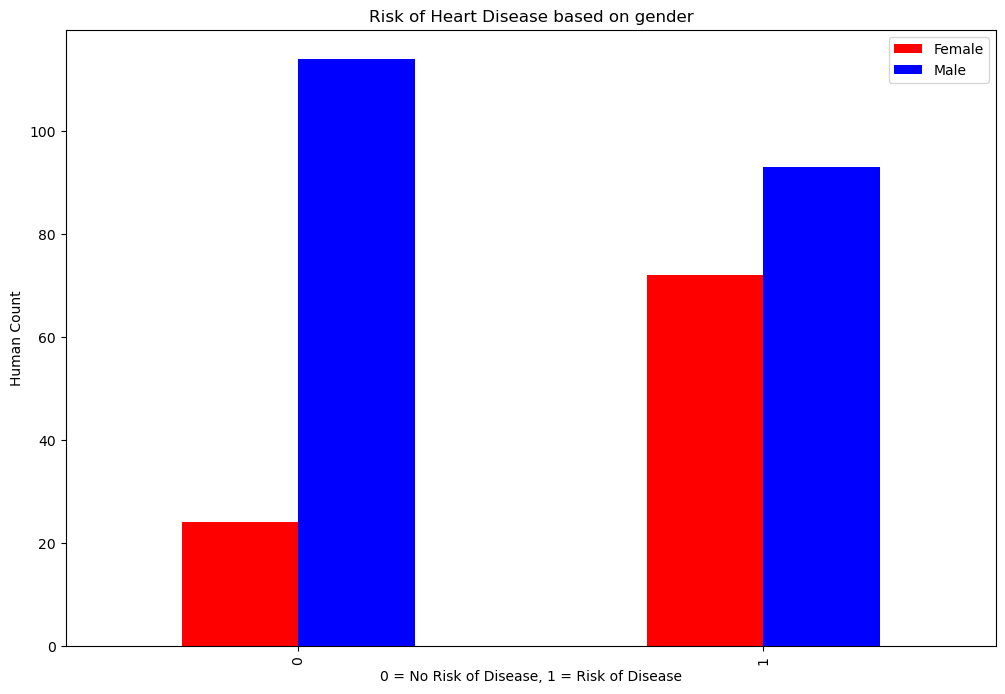

In [130]:
pd.crosstab(heartData.target, heartData.sex).plot(kind="bar", figsize=(12,8), color=["Red","Blue"])
plt.title("Risk of Heart Disease based on gender")
plt.xlabel("0 = No Risk of Disease, 1 = Risk of Disease")
plt.ylabel("Human Count")
plt.legend(["Female", "Male"])

## Pattern for Age and Heart Rate for Heart Disease
>Description:
>There is a pattern within the plotted graph that displays a downward trend as the age increases.
>The main concern is that the data is not decyphered properly and will have to be explored through a machine learning model

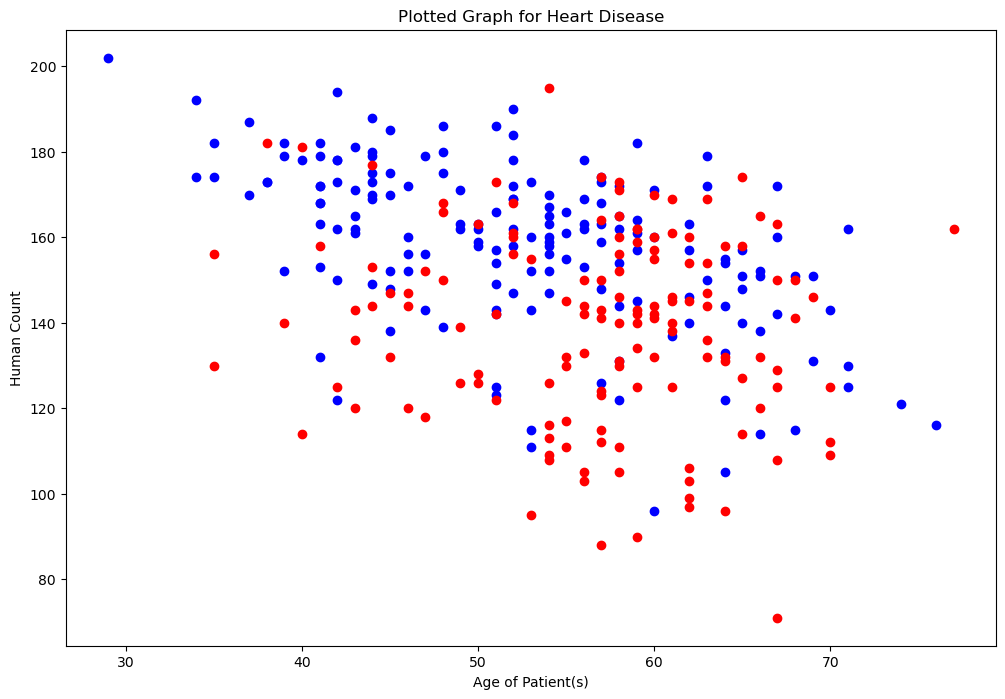

In [131]:
# Plot for patients with heart disease
plt.figure(figsize=(12,8))
plt.scatter(heartData.age[heartData.target==1],
            heartData.thalach[heartData.target==1],
            c="Blue")

# Plot for patients without heart disease
plt.scatter(heartData.age[heartData.target==0],
            heartData.thalach[heartData.target==0],
            c="Red")

plt.title("Plotted Graph for Heart Disease")
plt.xlabel("Age of Patient(s)")
plt.ylabel("Human Count");

## Chest Pain Analysis

In [132]:
pd.crosstab(heartData.cp, heartData.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


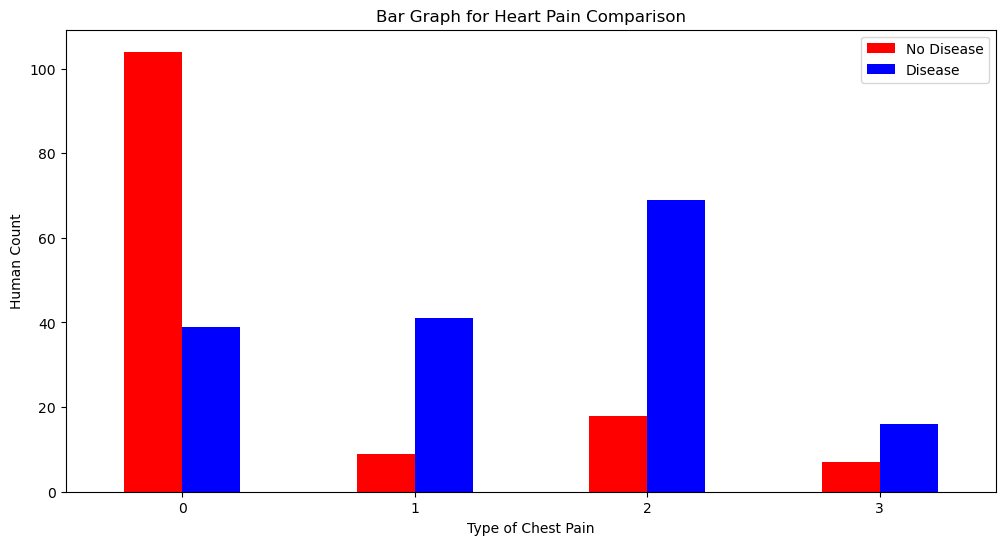

In [133]:
pd.crosstab(heartData.cp, heartData.target).plot(kind="bar", figsize=(12,6), color=["Red","Blue"])
plt.title("Bar Graph for Heart Pain Comparison")
plt.xlabel("Type of Chest Pain")
plt.ylabel("Human Count")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

## Correlation Matrix
>Description:
>Plot the correlation between each column within the dataset. The "Target" variable has been the general focus throughout exploring the dataset, but this matrix shows an overall depiction of how each column contributes toward heart disease. The higher the decimal towards 1.0 the more a cell relates with the intersecting cell. The more a cell leans toward the negative, the less a cell correlates with being the cause of heart disease. This matrix allows the viewer to spot trends between what causes heart disease, and the various factors that play a part.

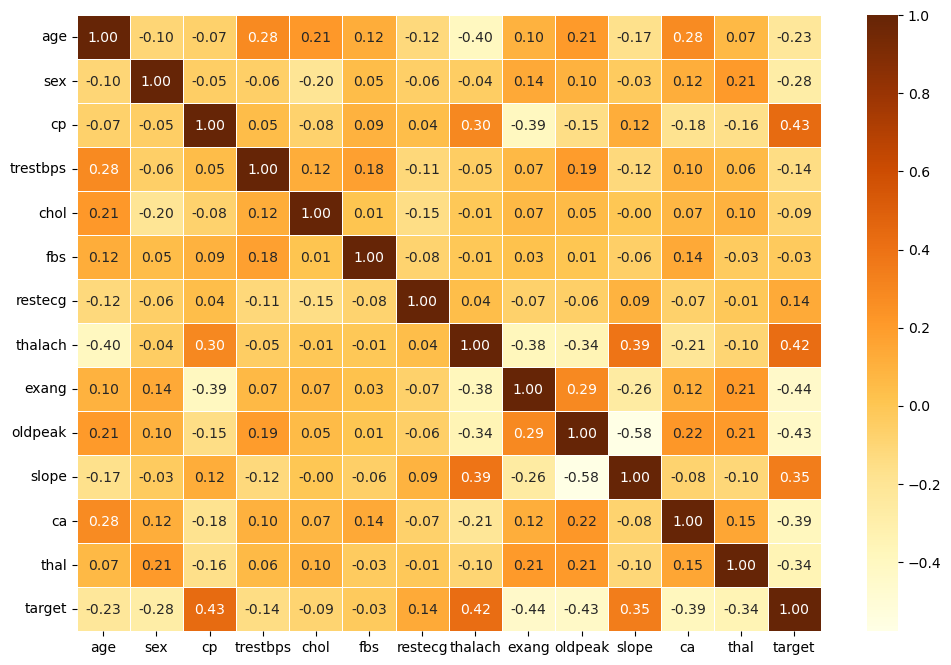

In [134]:
correlate_matrix = heartData.corr()
fig, num = plt.subplots(figsize=(12,8))
num = sns.heatmap(correlate_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlOrBr")

## Machine Learning Model
>Goal: To ensure that the model is good enough for production. Expected results are 90% accurate or above.

## Look at data
Observe the rows and columns again

In [135]:
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Split the data
>Goal: X (Dependent variable) isolates/drops the "target" column and Y (Labels) becomes the target column

In [136]:
X = heartData.drop("target", axis=1)
y = heartData["target"]

In [137]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [138]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Train and Test Split
>Goal: Training set = Data to be trained | Test set = Data to be evaluated

In [139]:
#Split data into train and test sets
np.random.seed(42)

#Split into train and test set
# X represents x-axis information. y represents the label(y axis information). X_train contains certain amount of rows. y_train label should match column.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [140]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [141]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## Build Machine Learning Model
>Goal: Data has been split between X and y. Now the results must be trained via train set to predict heart disease. Then tested via test set.

>The machine learning model should align with classification diagram

#### Algorithm(s):
> Logistic Regression: X predicts where y will be from a 0 to 1 range. This falls in line with the classification model for predicting heart disease.

In [150]:
# Dictionary to hold objects
model = {
            "Logistic Regression": LogisticRegression()
         }
# Function to store model
def model_Scores(model, X_train, X_test, y_train, y_test):
    # Random seed 42
    np.random.seed(42)
    #Empty Dictionary to store model score
    model_scores = {}
    #For loop to access items in model dictionary
    for name, model in model.items():
        #Fit model to data
        model.fit(X_train, y_train)
        #Take the model name and Append score to model_score key
        model_scores[name] = model.score(X_test,y_test)
        #Return model_scores which returns a dictionary
    return model_scores

In [151]:
model_scores = model_Scores(model = model,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\888\Desktop\heart_disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442}

## Plot Logistic Regression Model

In [152]:
model_plot = pd.DataFrame(model_scores, index=["Precision"])
model_plot

,Logistic Regression
Precision,0.885246


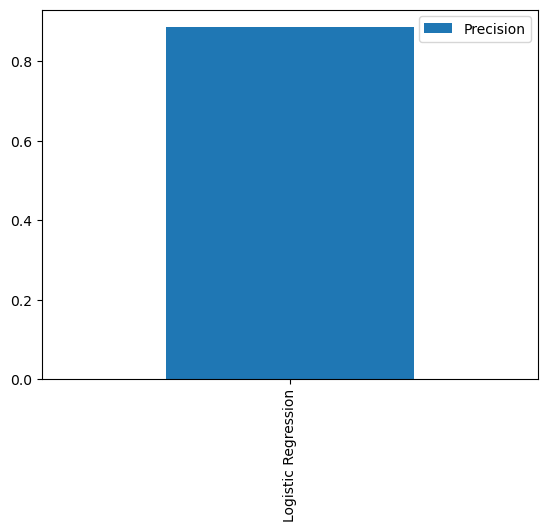

In [153]:
model_plot.T.plot.bar();

## Conclusion: 88% Accuracy (Failed)
>Goal: The goal is 90% or greater. Possibility to make improvements to reach goal.

# References

#### Banoula, M. (2023, August 21). Machine Learning Steps: A complete guide. Simplilearn.com. https://www.simplilearn.com/tutorials/machine-learning-tutorial/machine-learning-steps

#### Bourke, D. (2019, September 21). A 6 step field guide for building machine learning projects. Daniel Bourke. https://www.mrdbourke.com/a-6-step-field-guide-for-building-machine-learning-projects/

#### Deshmukh, H. (2022, May 25). Heart Disease UCI-Diagnosis & Prediction - towards Data science. Medium. https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7

#### Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

#### Keita, Z. (2022, September 21). Classification in Machine Learning: An Introduction. https://www.datacamp.com/blog/classification-machine-learning

#### UCI heart disease data. (2020, September 23). Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

#### Wagavkar, S. (2023, March 17). Introduction to the correlation Matrix. Built In. https://builtin.com/data-science/correlation-matrix

#### 1.6. Nearest neighbors. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/neighbors.html